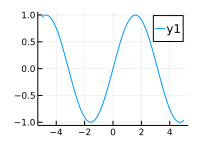

In [1]:
using Distributions
using Optim
using Plots
default(size=(400, 300), titlefontsize=10, tickfontsize=6)
plot(sin; size=(200, 150))

In [2]:
function f(X, m, w)
    μ = [w[1], w[2]]
    Σ = [w[3] w[4]; w[4] w[5]]
    Y = copy(X)
    Y[2, 1:m] = w[6:5+m]
    -loglikelihood(MvNormal(μ, Σ), Y)
end

dist = MvNormal([0, 0], [2 -1; -1 2])
n = 2^7
X = rand(dist, n)

m = 2^6
o = optimize(w -> f(X, m, w), [0;0; 1;0;1; zeros(m)], Optim.Options(iterations=10^6))

 * Status: success

 * Candidate solution
    Final objective value:     3.748610e+02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   11  (vs limit Inf)
    Iterations:    237697
    f(x) calls:    261559


In [3]:
w = o.minimizer

Y = copy(X)
Y[2, 1:m] = w[6:5+m]

@show w[1:2] w[3:5];

w[1:2] = [0.20830958917294737, -0.18050729640459184]
w[3:5] = [1.6892834176293767, -0.848833763368952, 1.1362648486254991]


In [4]:
fit_mle(MvNormal, X)

FullNormal(
dim: 2
μ: [0.20830445690364094, -0.23170239144845983]
Σ: [1.6892823270049047 -1.0532639006816722; -1.0532639006816722 2.1964428192651986]
)


In [5]:
fit_mle(MvNormal, X[:, m+1:end])

FullNormal(
dim: 2
μ: [0.16532784143413362, -0.15889994851549222]
Σ: [1.6336739952835777 -0.8208863863922352; -0.8208863863922352 1.83196027924537]
)


In [6]:
fit_mle(MvNormal, Y)

FullNormal(
dim: 2
μ: [0.20830445690364094, -0.18050541642411544]
Σ: [1.6892823270049047 -0.8488305171393894; -0.8488305171393894 1.1362615046445694]
)


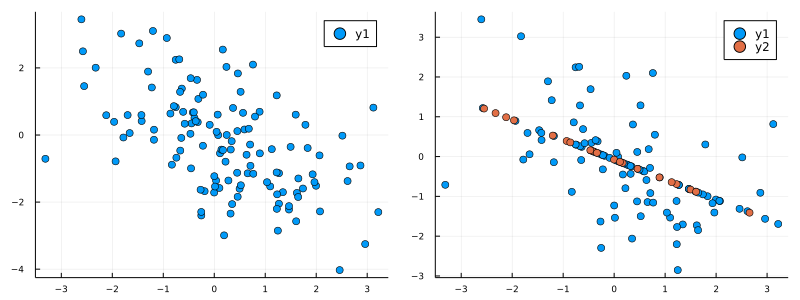

In [7]:
P = scatter(X[1,:], X[2,:])

Q = scatter(Y[1,21:end], Y[2,21:end])
scatter!(Y[1,1:20], Y[2,1:20])

plot(P, Q; size=(800, 300))